# MATH10053: Applied Stochastic Differential Equations: Assignment

This notebook accompanies the questions in the provided document `assignment.pdf`. Please refer to `assignment.pdf` for complete instructions and questions.

## Question 2

### 2.1

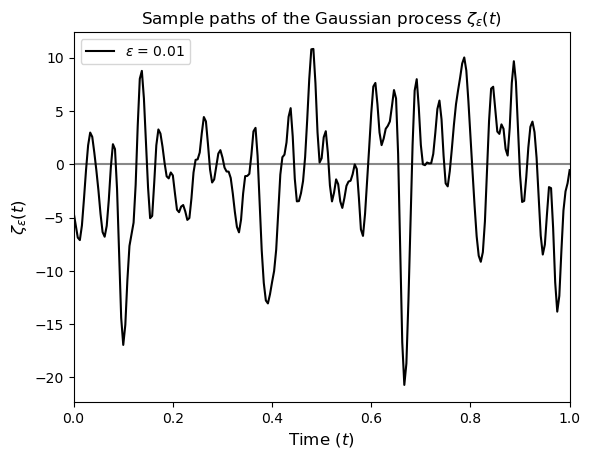

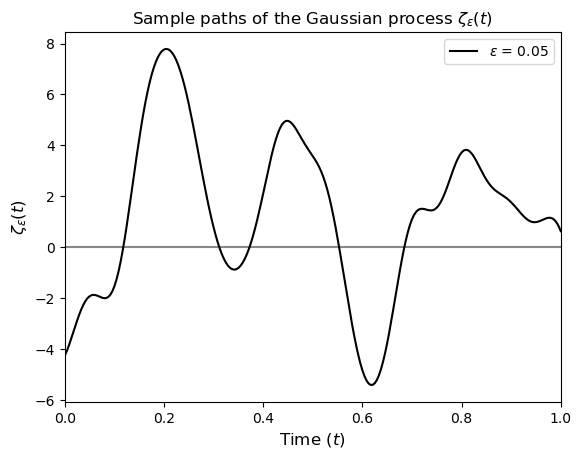

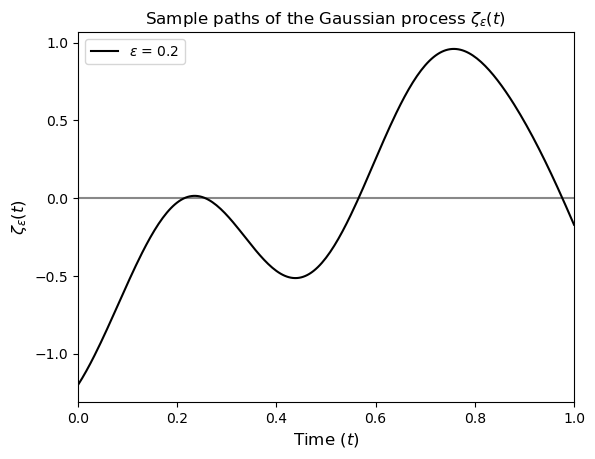

In [42]:
# Import necessary packages:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh

rng = np.random.default_rng()

# Set N as the suggested number of 'steps' for the interval t in [0, 1]
N = 240

# Fix the timestep dt = 1/240:
dt = 1.0 / N

# Generate a time vector t over the interval [0, 1]
t = np.linspace(0.0, N * dt, N + 1)

# Define functions S and Lambda:
def S(C, N):
    """
    Takes in a covariance function for a Gaussian process, as well as the number of 'steps'.
    Returns the covariance matrix S associated with the given covariance function, which is also a real symmetric
    matrix.
    ---------------------------------------------------------------------------------------------------------------
    inputs:
        C: the covariance function of a Gaussian process
        N: the chosen number of steps for the time interval
    outputs:
        S: the real symmetric covariance matrix of a Gaussian process
    """
    # Generate a (N + 1) x (N + 1) array of zeros
    S = np.zeros((N + 1, N + 1), dtype=np.float64)
    
    # Use a nested "for" loop to compute time values at each timestep
    for i in range(N + 1):
        t = i * dt
        for j in range(N + 1):
            s = j * dt
            # Compute each of the components of the covariance matrix S using the covariance function C
            S[i, j] = C(t, s)
    return S


def Lambda(S):
    """
    Takes in a real symmetric covariance matrix S.
    Returns the square root of the covariance matrix.
    ---------------------------------------------------------------------------------------------------------------
    inputs:
         S: covariance matrix
    outputs:
         Lam: square root of the covariance matrix
    """
    # use eigh() from scipy.linalg to solve the eigenvalue problem for the covariance matrix S
    D, Q = eigh(S)
    # Roundoff can lead to negative values in D with small magnitude --
    # the maximum here prevents these leading to imaginary elements in Lam
    # Use np.diag to compute the square root matrix of the eigenvalues of S, storing the eigenvalues on its diagonal
    Lam = Q @ np.diag(np.sqrt(np.maximum(D, 0.0)))
    return Lam
    

# Fix the values for each chosen epsilon:
eps_1 = 0.01
eps_2 = 0.05
eps_3 = 0.2


# Use functions S and Lambda defined above to compute the covariance matrices corresponding to the chosen epsilon
# values, as well as their corresponding square root matrices

S_gaussian_1 = S(C=lambda t, s: (1 / np.sqrt(2 * np.pi * eps_1**2)) * np.exp(-((t - s)**2) / (2 * eps_1**2)), N=N)
Lam_gaussian_1 = Lambda(S_gaussian_1)

S_gaussian_2 = S(C=lambda t, s: (1 / np.sqrt(2 * np.pi * eps_2**2)) * np.exp(-((t - s)**2) / (2 * eps_2**2)), N=N)
Lam_gaussian_2 = Lambda(S_gaussian_2)

S_gaussian_3 = S(C=lambda t, s: (1 / np.sqrt(2 * np.pi * eps_3**2)) * np.exp(-((t - s)**2) / (2 * eps_3**2)), N=N)
Lam_gaussian_3 = Lambda(S_gaussian_3)

# Generate realisations for the Gaussian process for

zeta_1 = Lam_gaussian_1 @ rng.standard_normal(size=N + 1)
zeta_2 = Lam_gaussian_2 @ rng.standard_normal(size=N + 1)
zeta_3 = Lam_gaussian_3 @ rng.standard_normal(size=N + 1)

# Plot each of the realisations against time on the interval t [0, 1]:
# Add axis lines, labels and legends to each plot to denote the value of epsilon being plotted for the realisation:

# epsilon = 0.01
plt.figure()
plt.axhline(0.0, color="#888888")
plt.plot(t, zeta_1, "k-", label=f"$\epsilon$ = {eps_1}")
plt.xlim(t[0], t[-1])
plt.xlabel(r"Time $(t)$", fontsize="large")
plt.ylabel(r"$\zeta_\epsilon \left( t \right)$", fontsize="large")
plt.title(r"Sample paths of the Gaussian process $\zeta_\epsilon \left( t \right)$", fontsize = "large")
plt.legend()
plt.show()

# epsilon = 0.05
plt.figure()
plt.axhline(0.0, color="#888888")
plt.plot(t, zeta_2, "k-", label=f"$\epsilon$ = {eps_2}")
plt.xlim(t[0], t[-1])
plt.xlabel(r"Time $(t)$", fontsize="large")
plt.ylabel(r"$\zeta_\epsilon \left( t \right)$", fontsize="large")
plt.title(r"Sample paths of the Gaussian process $\zeta_\epsilon \left( t \right)$", fontsize = "large")
plt.legend()
plt.show()

# epsilon = 0.2
plt.figure()
plt.axhline(0.0, color="#888888")
plt.plot(t, zeta_3, "k-", label=f"$\epsilon$ = {eps_3}")
plt.xlim(t[0], t[-1])
plt.xlabel(r"Time $(t)$", fontsize="large")
plt.ylabel(r"$\zeta_\epsilon \left( t \right)$", fontsize="large")
plt.title(r"Sample paths of the Gaussian process $\zeta_\epsilon \left( t \right)$", fontsize = "large")
plt.legend()
plt.show()

### 2.2

You may assume that the code cell for Question 2.1 is run prior to running the code cell for Question 2.2.

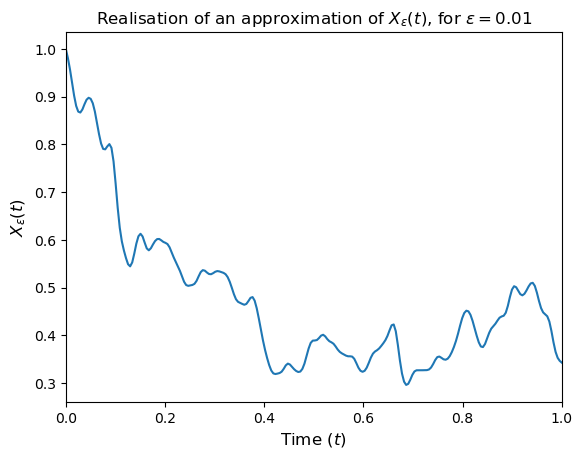

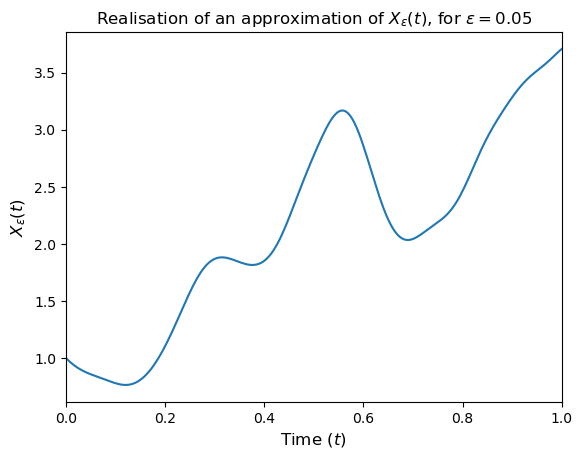

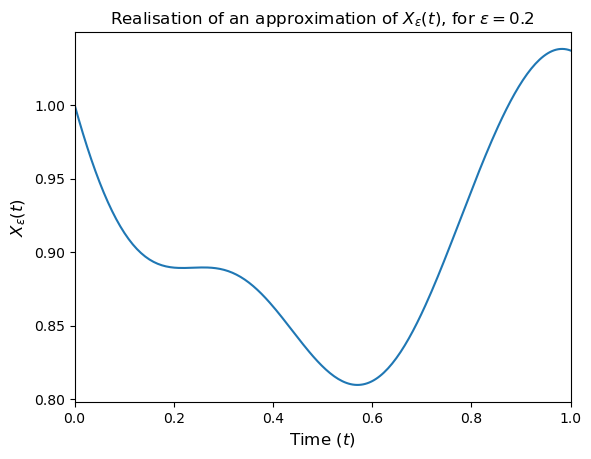

In [43]:
# Define the function X_t_euler_maruyama:
def X_t_euler_maruyama(x_0, zeta, t):
    """
    Takes in the intial condition x_0, the realisation of a Gaussian process zeta, and the time array t.
    Returns the Euler-Maruyama discretisation for our given Stochastic Differential Equation from the question.
    
    inputs:
        x_0: the initial condition of the SDE
        zeta: the realisation of a Gaussian process
        t: the time array
        
    returns:
        X: the Euler-Maruyama discretisation for the SDE
    """
    # Fix size of time vector and decrement the value of N for iteration:
    N, = t.shape
    N -= 1
    
    # Use np.zeros_like to create an array for X which is the same size as the time vector t:
    X = np.zeros_like(t)
    
    # Set the initial condition:
    X[0] = x_0
    
    # Fix the timestep:
    dt = 1.0/N
    
    # iterate over the number of steps, N to implement the Euler-Maruyama discretisation for the SDE:
    for i in range(N):
        X[i + 1] = X[i] + X[i] * zeta[i] * dt
        
    return X

# Restate the time vector t for the interval [0,1]:
t = np.linspace(0.0, 1.0, N, dtype=np.float64)


# Use the function X_t_euler_maruyama to generate realisations of approximations for X(t) on [0, 1], for
# each value of epsilon, using the initial condtion x_0 = 1:
X_epsilon_1 = X_t_euler_maruyama(1.0, zeta_1, t)
X_epsilon_2 = X_t_euler_maruyama(1.0, zeta_2, t)
X_epsilon_3 = X_t_euler_maruyama(1.0, zeta_3, t)

# Plot the realisations for each value of epsilon:

# epsilon = 0.01:
plt.figure()
plt.plot(t, X_epsilon_1)
plt.xlabel(r"Time $(t)$", fontsize="large")
plt.ylabel(r"$X_\epsilon(t)$", fontsize="large")
plt.xlim(t[0], t[-1])
plt.title(r"Realisation of an approximation of $X_\epsilon(t)$, for $\epsilon = 0.01$")
plt.show()

# epsilon = 0.05:
plt.figure()
plt.plot(t, X_epsilon_2)
plt.xlabel(r"Time $(t)$", fontsize="large")
plt.ylabel(r"$X_\epsilon(t)$", fontsize="large")
plt.xlim(t[0], t[-1])
plt.title(r"Realisation of an approximation of $X_\epsilon(t)$, for $\epsilon = 0.05$")
plt.show()

# epsilon = 0.2:
plt.figure()
plt.plot(t, X_epsilon_3)
plt.xlabel(r"Time $(t)$", fontsize="large")
plt.ylabel(r"$X_\epsilon(t)$", fontsize="large")
plt.xlim(t[0], t[-1])
plt.title(r"Realisation of an approximation of $X_\epsilon(t)$, for $\epsilon = 0.2$")
plt.show()

None

### 2.2 justification of decisions

In question $2.2$, I decided to use the Euler-Maruyama discretisation in order to generate realisations for the approximations of $X_\epsilon(t)$. This was due to my opinion that it was the simplest numerical method to implement without having to made drastic alterations in my code for question $2.1$.

I chose to decrement N in the definition of my function, `X_t_euler_maruyama`as when I tried to run it in the beginning I encountered several problems with indexing, when attempting to implement Euler-Maruyama for the SDE.

I also decided not to use "for" loops in either this question or $2.1$ when plotting the realisations, as I felt it was easier to treat each of the realisations as vectors, which I thought made life a lot easier when calling them individually. Plotting each realisation on a separate plot prevented "muddying" of the plots and allowed me to observe the various patterns and behaviours more clearly on each of the plots.

### 2.3

You may assume that the code cells for Questions 2.1 and 2.2 are run prior to running the code cell for Question 2.3.

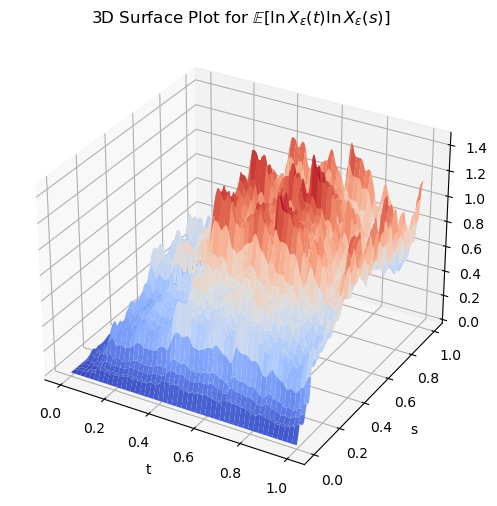

In [44]:
# Import necessary packages:
from mpl_toolkits.mplot3d import Axes3D

# Create new time vectors to represent t and s:
t = np.linspace(0.0, N * dt, N + 1)
s = t

# Fix the number of realisations to a fairly low number to increase computation speed:
realisations = 80

# Initialize array of zeros to store the results:
ln_expectation_surface = np.zeros((N + 1, N + 1))

# Iterate over the realisations to implement the log-expectation for epsilon = 0.01 and store it in an array:
for k in range(realisations):
    ln_expectation_realisation_t = np.log(X_t_euler_maruyama(1.0, zeta_1, t))
    
    # Use a nested for loop to compute the components of a log-covariance matrix, using the function
    # X_t_euler_maruyama from 2.2:
    for i, t[i] in enumerate(t):
        ln_expectation_realisation_s = np.log(X_t_euler_maruyama(1.0, zeta_1, s))
        for j, s[j] in enumerate(s):
            ln_expectation_surface[i, j] += ln_expectation_realisation_t[i] * ln_expectation_realisation_s[j]

# Compute the expectation by averaging over the realisations:
ln_expectation_surface /= realisations

# Create a 3D surface plot:
T, S = np.meshgrid(t, s)
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, S, ln_expectation_surface, cmap='coolwarm')

# Add labels to the surface plot:
ax.set_xlabel('t')
ax.set_ylabel('s')
ax.set_title(r'3D Surface Plot for $\mathbb{E}[\ln{X_\epsilon(t)}\ln{X_\epsilon(s)}]$')

plt.show()

# External sources used when computing code for Question 2.3:
# Matplotlib documentation; mpl_toolkits.mplot3D
# Honours Differential Equations Skills Project, questions 4a, 4c

### 2.3 discussion

In the 3D surface plot generated above for the log-expectation of the Gaussian process, $\mathbb{E}[\ln(X_\epsilon(t)X_\epsilon(s))]$, we can see that the plot exhibits certain behaviours, as $t$, $s$ and $\mathbb{E}[\ln(X_\epsilon(t)X_\epsilon(s))]$ all increase to their fixed limits.

We notice a general trend for $t$ which is that the log-expectation is largely unaffected by the values, save for $t = 0.8$ and above. However, we observe that for $s$ the log-expectation osciallates rapidly and spikes signficantly as $s$ increases, at a consistent rate of increase as $s$ increases between $0$ and $1$. This is most likely due to the realisations of Gaussian processes showing rapily oscillating behaviour, which we have observed with the realisations of such processes for low values of epsilon in our given covariance function, such as the $\epsilon = 0.01$ which we have observed in all three questions. As expected, the plot will be different every time the code is run for this Gaussian process due to the composition of the process. 

Note; the z-axis is meant to be labelled with $\mathbb{E}[\ln(X_\epsilon(t)X_\epsilon(s))]$, however when I tried to add it into the code, it would not appear in full on the plot hence I chose to leave it blank and add this message.